In [192]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression




In [193]:
DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml/tree/master/'
HOUSING_PATH = "datasets/housing"
HOUSING_URL =  DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # fetch the data from housing_url
    urllib.request.urlretrieve(housing_url, tgz_path)
    # extract the tgz file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


# fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Take a Quick Look at the Data Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.8

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

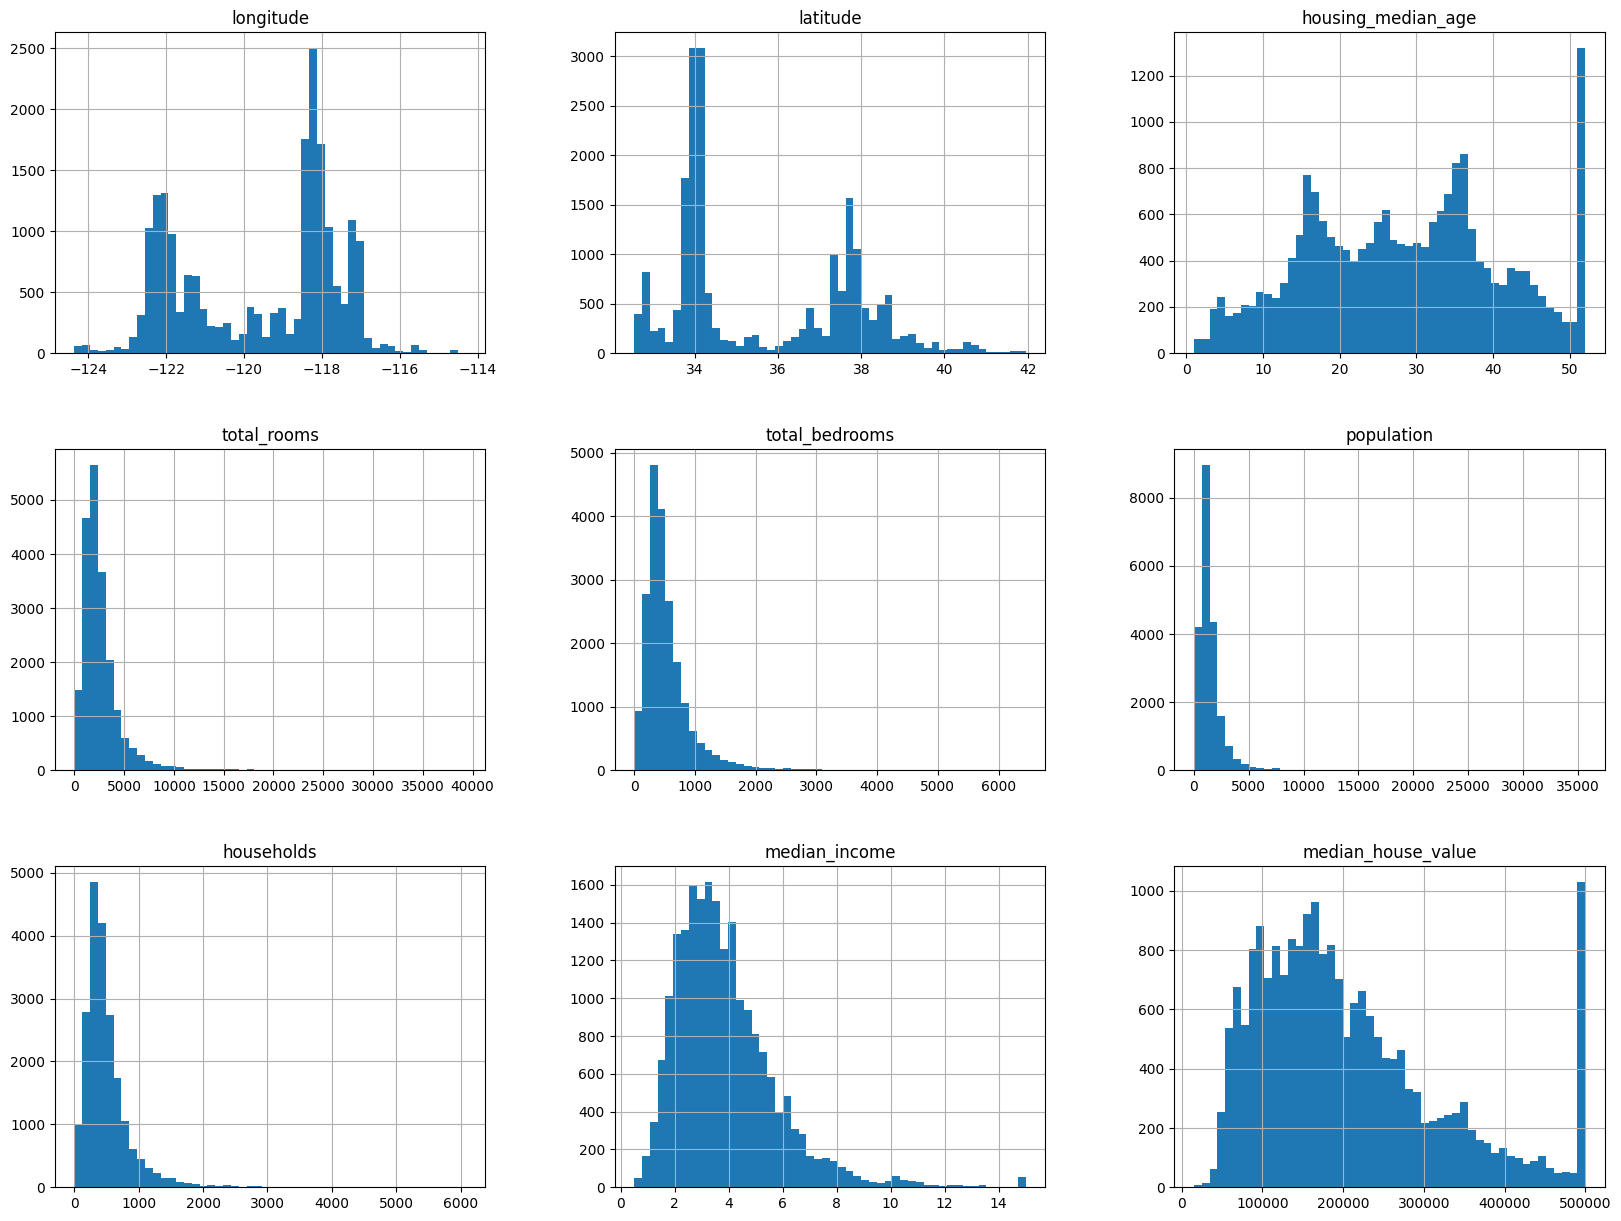

In [219]:
housing = load_housing_data()
print(housing.info())
print(housing.head())
# print(housing.describe())
housing.hist(bins=50, figsize=(20, 15))

# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Straitified Sampling Method


In [195]:
# housing['median_income'].hist()
# housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
# # housing['income_cat'].hist()
# # print(housing['income_cat'])

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(housing, housing['income_cat']):
#     strat_train_set = housing.loc[train_index]
#     strat_test_set = housing.loc[test_index]

# # test if this works as expected
# # print(housing['income_cat'].value_counts() / len(housing))
# compare = pd.DataFrame()
# compare['overall'] = housing['income_cat'].value_counts() / len(housing)
# # print(compare['overall'])
# compare['stratified'] = strat_train_set["income_cat"].value_counts() / len(strat_train_set) 
# compare['start_rate'] = compare['overall'] / compare['stratified']
# print(compare)

# # remove income_cat field 
# for set in (strat_train_set, strat_test_set):
#     set.drop(['income_cat'], axis=1, inplace=True)

Discover and Visualize the Data to Gain Insights

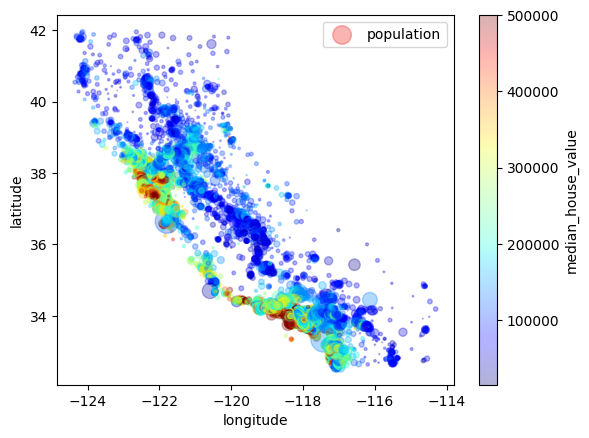

In [220]:
# Visualizing Geographical Data

# housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/100, label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  room_per_household  \
0       322.0       126.0         8.3252        NEAR BAY            6.984127   
1      2401.0      1138.0         8.3014        NEAR BAY            6.238137   
2       496.0       177.0         7.2574        NEAR BAY            8.288136   
3       558.0       219.0         5.6431        NEAR BAY            5.817352   
4       565.0       259.0         3.8462        NEAR BAY            6.281853   

   bedrooms_per_room  population_per_household  
0           0.14659

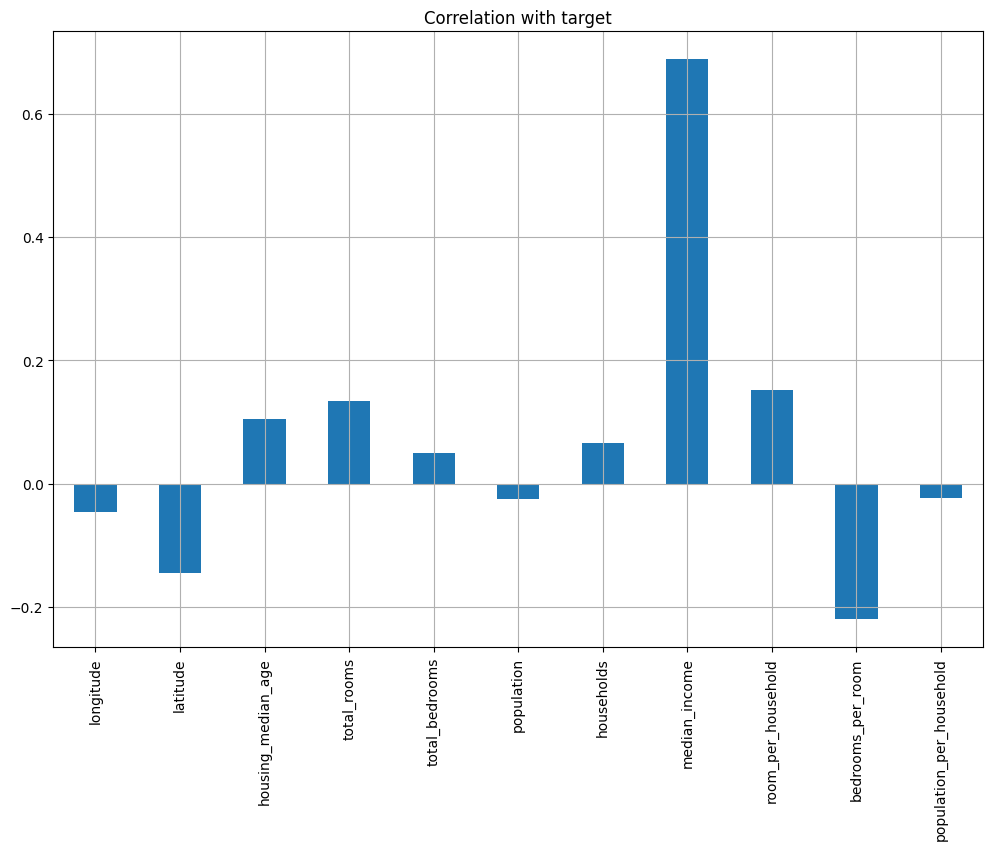

In [238]:

# Looking for Correlations
# print(housing.head())

# corr_matrix = housing.corr()

# Experimenting with Attribute Combination
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']


if 'ocean_proximity' in housing.columns:    
    housing_insight = housing.drop('ocean_proximity', axis=1)
else:
    print("Column 'ocean_proximity' not found.")
corr_matrix = housing_insight.corr()
# print(corr_matrix['median_house_value'].sort_values(ascending=False))

# print(housing_insight.info())
# print(housing_insight.median_house_value)
X = housing.drop('median_house_value', axis=1)
Y = housing.median_house_value
X.drop('ocean_proximity', axis=1).corrwith(Y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

print(X.head())

Prepare the Data for Machine Learning Algorithms

In [198]:
# housing = strat_train_set.drop('median_house_value', axis=1)
# housing_label = strat_train_set['median_house_value'].copy()
# print("housing_label : ", housing_label)
# print(housing.head())

Data Cleaning

In [239]:
# housing.dropna(subset=['total_bedrooms']) # Get rid of the corresponding districts(row)
# housing.drop('total_bedrooms', axis=1)  # Get rid of the whole attribute

# # Set the values to some value (zero, the mean, the median, etc.).
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median)

# Using imputer
# imputer = SimpleImputer(strategy="median")
# housing_num = housing.drop('ocean_proximity', axis=1)
# imputer.fit(housing_num)


# Create imputer for numerical and categorical data
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Imputer numerical columns
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Imputer categorical columns
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


print(X.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  room_per_household  \
0       322.0       126.0         8.3252        NEAR BAY            6.984127   
1      2401.0      1138.0         8.3014        NEAR BAY            6.238137   
2       496.0       177.0         7.2574        NEAR BAY            8.288136   
3       558.0       219.0         5.6431        NEAR BAY            5.817352   
4       565.0       259.0         3.8462        NEAR BAY            6.281853   

   bedrooms_per_room  population_per_household  
0           0.14659

Handling Text and Categorical Attributes

In [240]:
# print(housing.head())
X_encoded = pd.get_dummies(X['ocean_proximity'])
X.drop('ocean_proximity', axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)
# print(housing.head())
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   room_per_household        20640 non-null  float64
 9   bedrooms_per_room         20640 non-null  float64
 10  population_per_household  20640 non-null  float64
 11  <1H OCEAN                 20640 non-null  bool   
 12  INLAND                    20640 non-null  bool   
 13  ISLAND                    20640 non-null  bool   
 14  NEAR B

Custom Trasformers

In [211]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder():
    def __init__(self, add_bedrooms_per_room = True) -> None:
         self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing = pd.DataFrame(housing_extra_attribs)
print(housing.head())

       0      1     2       3       4       5       6       7         8   \
0 -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  6.984127   
1 -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  6.238137   
2 -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  8.288136   
3 -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  5.817352   
4 -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  6.281853   

         9         10     11     12     13    14     15        16        17  
0  0.146591  2.555556  False  False  False  True  False  6.984127  2.555556  
1  0.155797  2.109842  False  False  False  True  False  6.238137  2.109842  
2  0.129516   2.80226  False  False  False  True  False  8.288136   2.80226  
3  0.184458  2.547945  False  False  False  True  False  5.817352  2.547945  
4  0.172096  2.181467  False  False  False  True  False  6.281853  2.181467  


Feature Scaling

In [243]:
std_scaler = StandardScaler()

# Fit and transform the data
X_scaled = std_scaler.fit_transform(X)

# Convert back to Dataframe
X_scaled = pd.DataFrame(X_scaled)

print(X_scaled.head())
# print(housing_scaled.info())

         0         1         2         3         4         5         6   \
0 -1.327835  1.052548  0.982143 -0.804819 -0.975228 -0.974429 -0.977033   
1 -1.322844  1.043185 -0.607019  2.045890  1.355088  0.861439  1.669961   
2 -1.332827  1.038503  1.856182 -0.535746 -0.829732 -0.820777 -0.843637   
3 -1.337818  1.038503  1.856182 -0.624215 -0.722399 -0.766028 -0.733781   
4 -1.337818  1.038503  1.856182 -0.462404 -0.615066 -0.759847 -0.629157   

         7         8         9         10        11        12        13  \
0  2.344766  0.628559 -0.973116 -0.049597 -0.891156 -0.681889 -0.015566   
1  2.332238  0.327041 -0.841159 -0.092512 -0.891156 -0.681889 -0.015566   
2  1.782699  1.155620 -1.217873 -0.025843 -0.891156 -0.681889 -0.015566   
3  0.932968  0.156966 -0.430311 -0.050329 -0.891156 -0.681889 -0.015566   
4 -0.012881  0.344711 -0.607519 -0.085616 -0.891156 -0.681889 -0.015566   

         14        15  
0  2.830742 -0.384466  
1  2.830742 -0.384466  
2  2.830742 -0.384466  
3 

Select and Train a Model

In [246]:

X_train, x_test, Y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print(X_train.info())

print(x_test.info())

# lin_reg = LinearRegression()

# print(housing_label)
# lin_reg.fit(housing_scaled, housing_label)

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float64
 1   1       16512 non-null  float64
 2   2       16512 non-null  float64
 3   3       16512 non-null  float64
 4   4       16512 non-null  float64
 5   5       16512 non-null  float64
 6   6       16512 non-null  float64
 7   7       16512 non-null  float64
 8   8       16512 non-null  float64
 9   9       16512 non-null  float64
 10  10      16512 non-null  float64
 11  11      16512 non-null  float64
 12  12      16512 non-null  float64
 13  13      16512 non-null  float64
 14  14      16512 non-null  float64
 15  15      16512 non-null  float64
dtypes: float64(16)
memory usage: 2.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  


In [ ]:
some_data = X_train[:5]
some_label = Y_train[:5]


print("SomeData : ", some_data)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
linear_predict = lin_reg.predict(some_data)
print("Predictions : \t ", linear_predict)
print("Labels : \t", some_label)

SomeData :               0         1         2         3         4         5         6   \
14196  1.267645 -1.367976  0.346478  0.224718  0.212589  0.772251  0.322924   
8267   0.703627 -0.871699  1.617807  0.342065  0.594217 -0.098440  0.670799   
17445 -0.454356 -0.455012 -1.957806 -0.338639 -0.493422 -0.450778 -0.427755   
14265  1.227714 -1.377340  0.584852 -0.556832 -0.407556 -0.006602 -0.378059   
2271  -0.114948  0.537543  1.141059 -0.116322 -0.254905 -0.486983 -0.312669   

             7         8         9         10        11        12        13  \
14196 -0.321654 -0.166259 -0.199278  0.059808 -0.891156 -0.681889 -0.015566   
8267  -0.030620 -0.386181  0.261237 -0.128306 -0.891156 -0.681889 -0.015566   
17445  0.150349  0.087641 -0.573258 -0.033453 -0.891156 -0.681889 -0.015566   
14265 -1.014947 -0.576442  0.627713  0.088940 -0.891156 -0.681889 -0.015566   
2271  -0.166583  0.339282 -0.480739 -0.074203 -0.891156  1.466514 -0.015566   

             14        15  
14196 -0.3

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, Y_train)

prediction = tree_reg.predict(x_test[:1])

print("DecisionTreeRegreesor prediction: ", prediction)
print("TrainData", y_test[:1])

DecisionTreeRegreesor prediction:  [42500.]
TrainData 20046    47700.0
Name: median_house_value, dtype: float64


In [256]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X_train, Y_train)


RandomForestRegressor()

Evaluating

In [252]:
from sklearn.metrics import mean_squared_error

tree_prediction = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


Better Evaluation Using Cross-Validation

In [257]:


from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)

rmse_scores = np.sqrt(-scores)

print("Mean squared error for each fold : ", rmse_scores)
print("Average MSE for each fold : ", rmse_scores.mean())
print("STD Average MSE for each fold : ", rmse_scores.std())




Mean squared error for each fold :  [46847.91872952 51457.6896024  49578.34025105 51602.9728333
 52060.71178917 47348.74106533 47728.31042849 50830.04742922
 49677.66037786 49918.62614373]
Average MSE for each fold :  49705.101865006895
STD Average MSE for each fold :  1765.6140251438094
